In [1]:
import pandas as pd
import matplotlib.pyplot as plt




```
imports the Pandas library and renames it as "pd." It also imports the pyplot module from Matplotlib and renames it as "plt," allowing for data manipulation and visualization using Pandas and Matplotlib in subsequent code.


```



In [2]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



```
imports the WordCloud class from the wordcloud library and the TfidfVectorizer class from scikit-learn for text data processing. Additionally, it imports the linear_kernel function from scikit-learn to compute the linear kernel between vectors, commonly used in text similarity calculations.
```



In [3]:
movies=pd.read_csv('/content/movies.csv')




```
This line of code reads a CSV file named 'movies.csv' located at the specified path ('/content/') into a Pandas DataFrame named 'movies'.
```



In [16]:
ratings=pd.read_csv('/content/ratings.csv')



```
This line of code reads a CSV file named 'ratings.csv' located at the specified path ('/content/') into a Pandas DataFrame named 'movies'.
```



In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB




```
This line of code prints a concise summary of the 'movies' DataFrame, including information about the columns, data types, and memory usage.
```



In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB




```
DataFrame named 'ratings,' the line ratings.info() prints a concise summary of the DataFrame, including information about the columns, data types, and memory usage.
```



In [5]:
movies.shape

(10329, 3)



```
The line `movies.shape` returns a tuple representing the dimensions of the 'movies' DataFrame, where the first element is the number of rows and the second element is the number of columns.
```



In [18]:
ratings.shape

(105339, 4)



```
The line `ratings.shape` returns a tuple representing the dimensions of the 'ratings' DataFrame, where the first element is the number of rows and the second element is the number of columns.
```



In [6]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000




```
The line movies.describe() generates descriptive statistics of the numerical columns in the 'movies' DataFrame, including count, mean, standard deviation, minimum, and various percentiles
```



In [19]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09




```
The `ratings.describe()` line provides descriptive statistics for the numerical columns in the 'ratings' DataFrame, offering insights into count, mean, standard deviation, minimum, and various percentiles of the data.
```



In [7]:
genres=[]
for genre in movies.genres:

    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)



```
This code snippet creates a list 'genres' containing unique movie genres extracted from the 'movies' DataFrame by splitting and iterating over the 'genres' column. It also creates a list 'movie_title' by removing the last 7 characters from each movie title in the 'title' column. Finally, both lists are converted to string representations.
```



In [8]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)



```
These lines of code create two WordCloud objects: 'wordcloud_genre' with specified parameters for visualizing movie genres, and 'wordcloud_title' for visualizing movie titles. The WordClouds are configured with custom settings for width, height, background color, minimum font size, and minimum word length.```



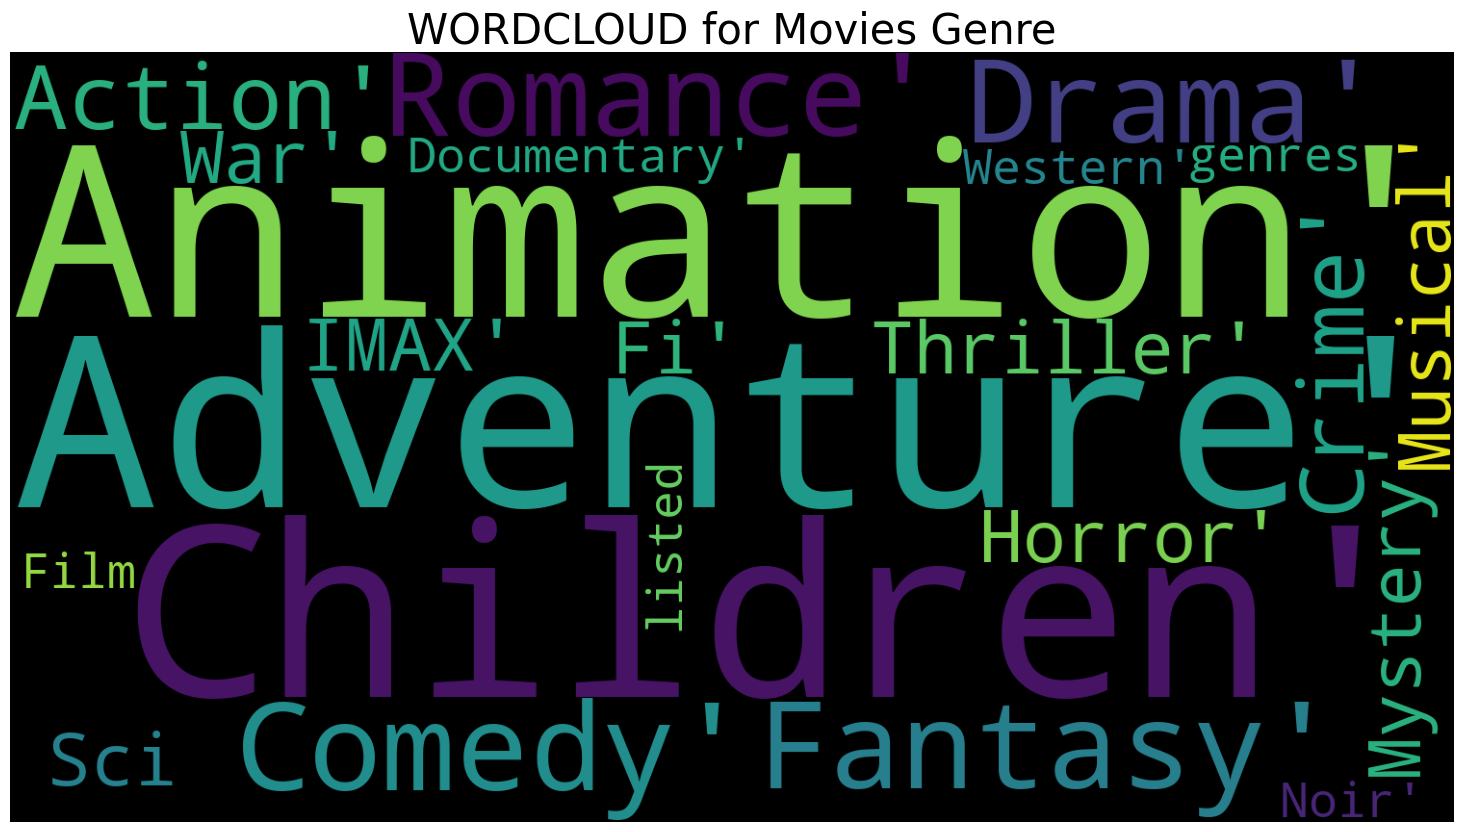

In [9]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)



```
These lines of code configure a Matplotlib figure with a size of 30x10 inches, turn off the axis, set a title for the WordCloud visualization ('WORDCLOUD for Movies Genre') with a font size of 30, and display the 'wordcloud_genre' using the `plt.imshow()` function.```



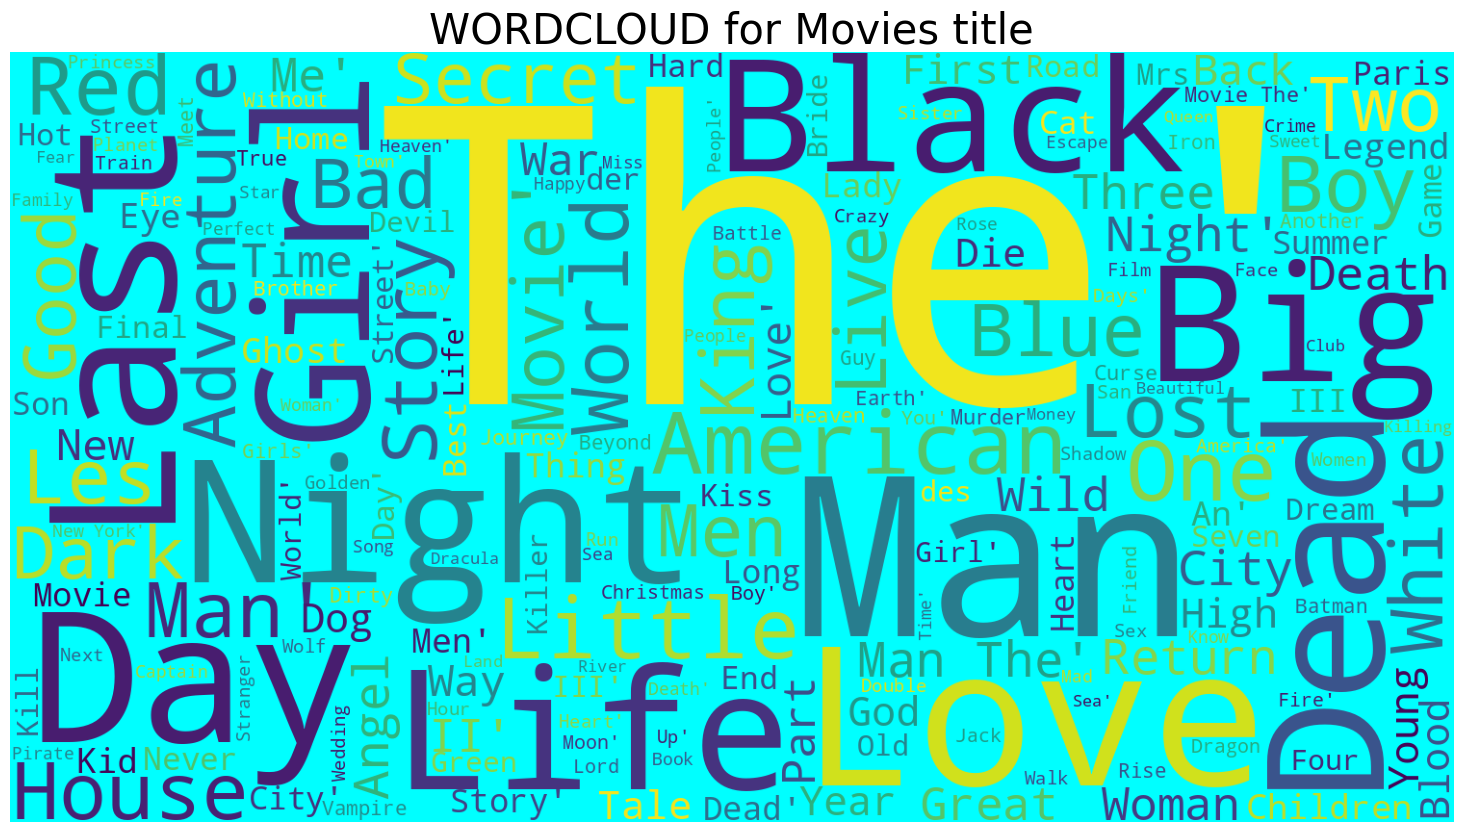

In [10]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)



```
These lines of code configure another Matplotlib figure with a size of 30x10 inches, turn off the axis, set a title for the WordCloud visualization ('WORDCLOUD for Movies Title') with a font size of 30, and display the 'wordcloud_title' using the `plt.imshow()` function.```



In [20]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller




```
These lines of code merge the 'ratings' and 'movies' DataFrames using a left join based on the 'movieId' column and store the result in a new DataFrame 'df'. The `df.head()` then displays the first few rows of the merged DataFrame.```



In [21]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()


,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5




```
These lines of code group the 'df' DataFrame by 'title,' summing up the 'rating' column for each movie. Then, it selects the top 20 movies with the highest total ratings using the `nlargest()` function and stores the result in the 'high_rated' DataFrame. Finally, `high_rated.head()` displays the first few rows of the DataFrame containing the highest-rated movies.```



<BarContainer object of 20 artists>

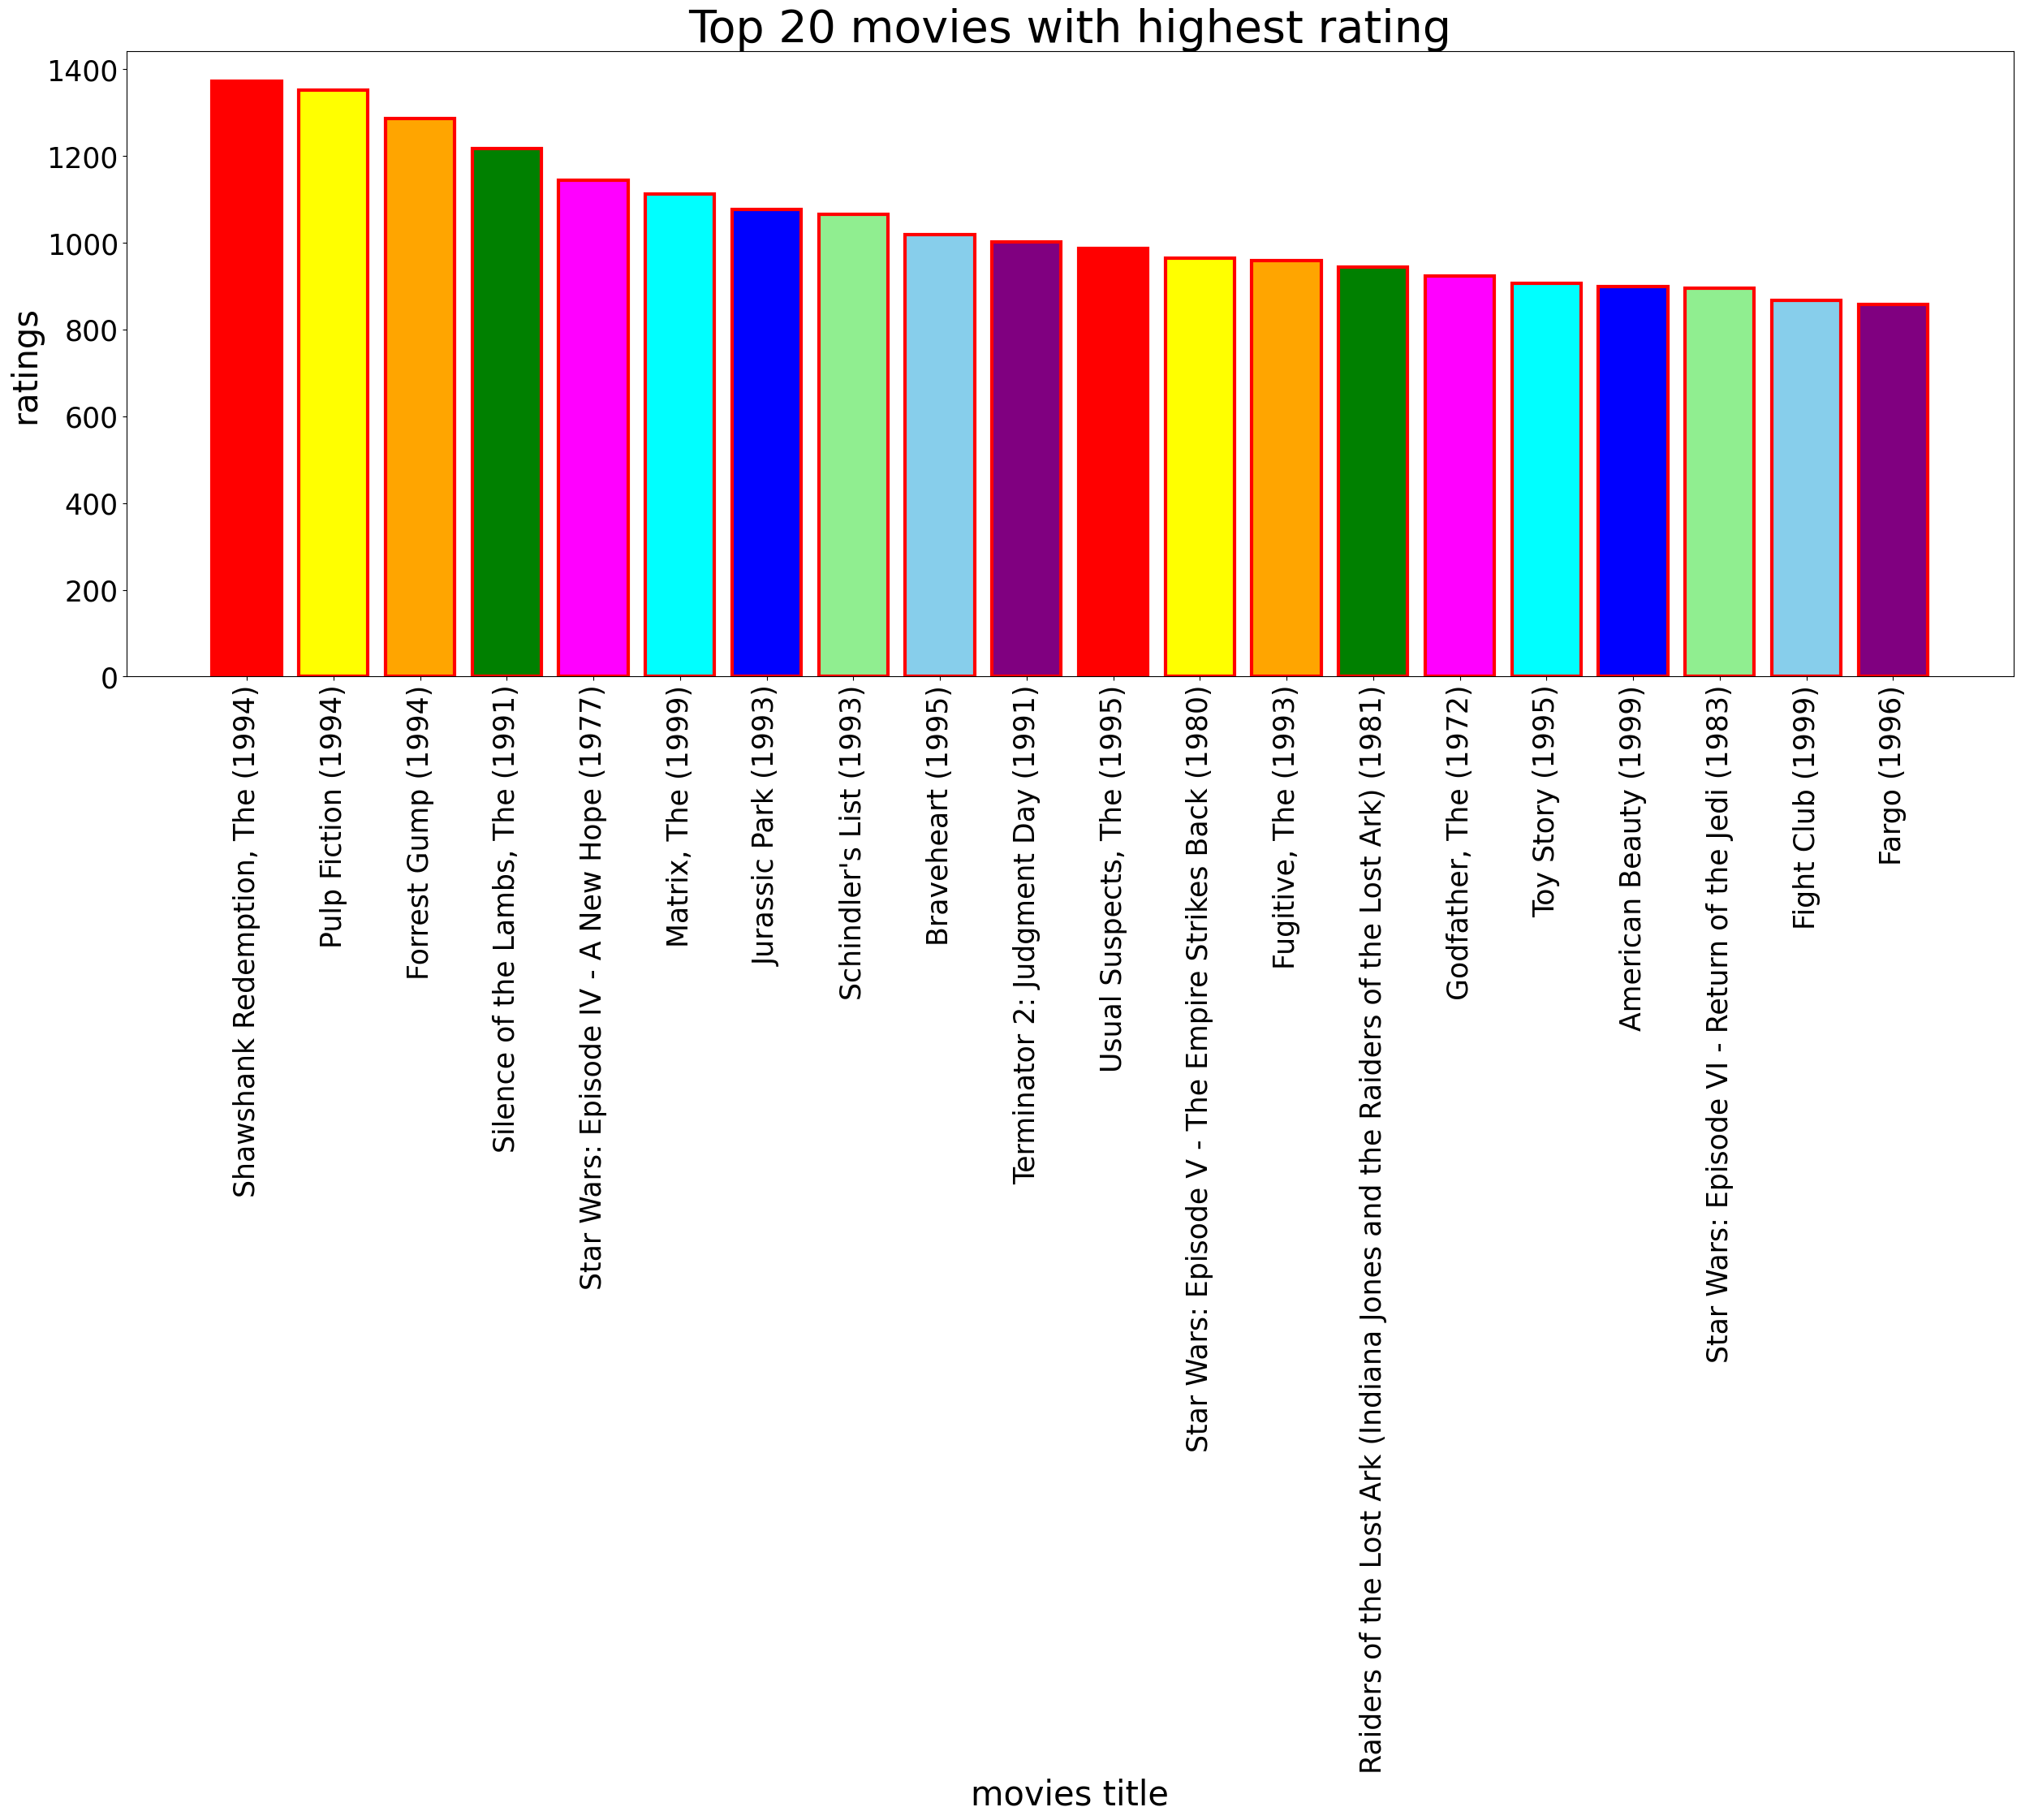

In [22]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)



```
These lines of code create a bar plot using Matplotlib with a figure size of 30x10 inches. The plot visualizes the top 20 movies with the highest ratings from the 'high_rated' DataFrame. Customizations include setting the title, colors for the bars, axis labels, and adjusting the font sizes for better readability. The `plt.bar()` function is used to create the bar chart based on the movie titles and their corresponding ratings.```



In [23]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290




```
These lines of code group the 'df' DataFrame by 'title,' counting the number of ratings for each movie. It then selects the top 20 movies with the highest rating counts using the `nlargest()` function and stores the result in the 'rating_count_20' DataFrame. The `rating_count_20.head()` displays the first few rows of the DataFrame containing the movies with the highest number of ratings.```



<BarContainer object of 20 artists>

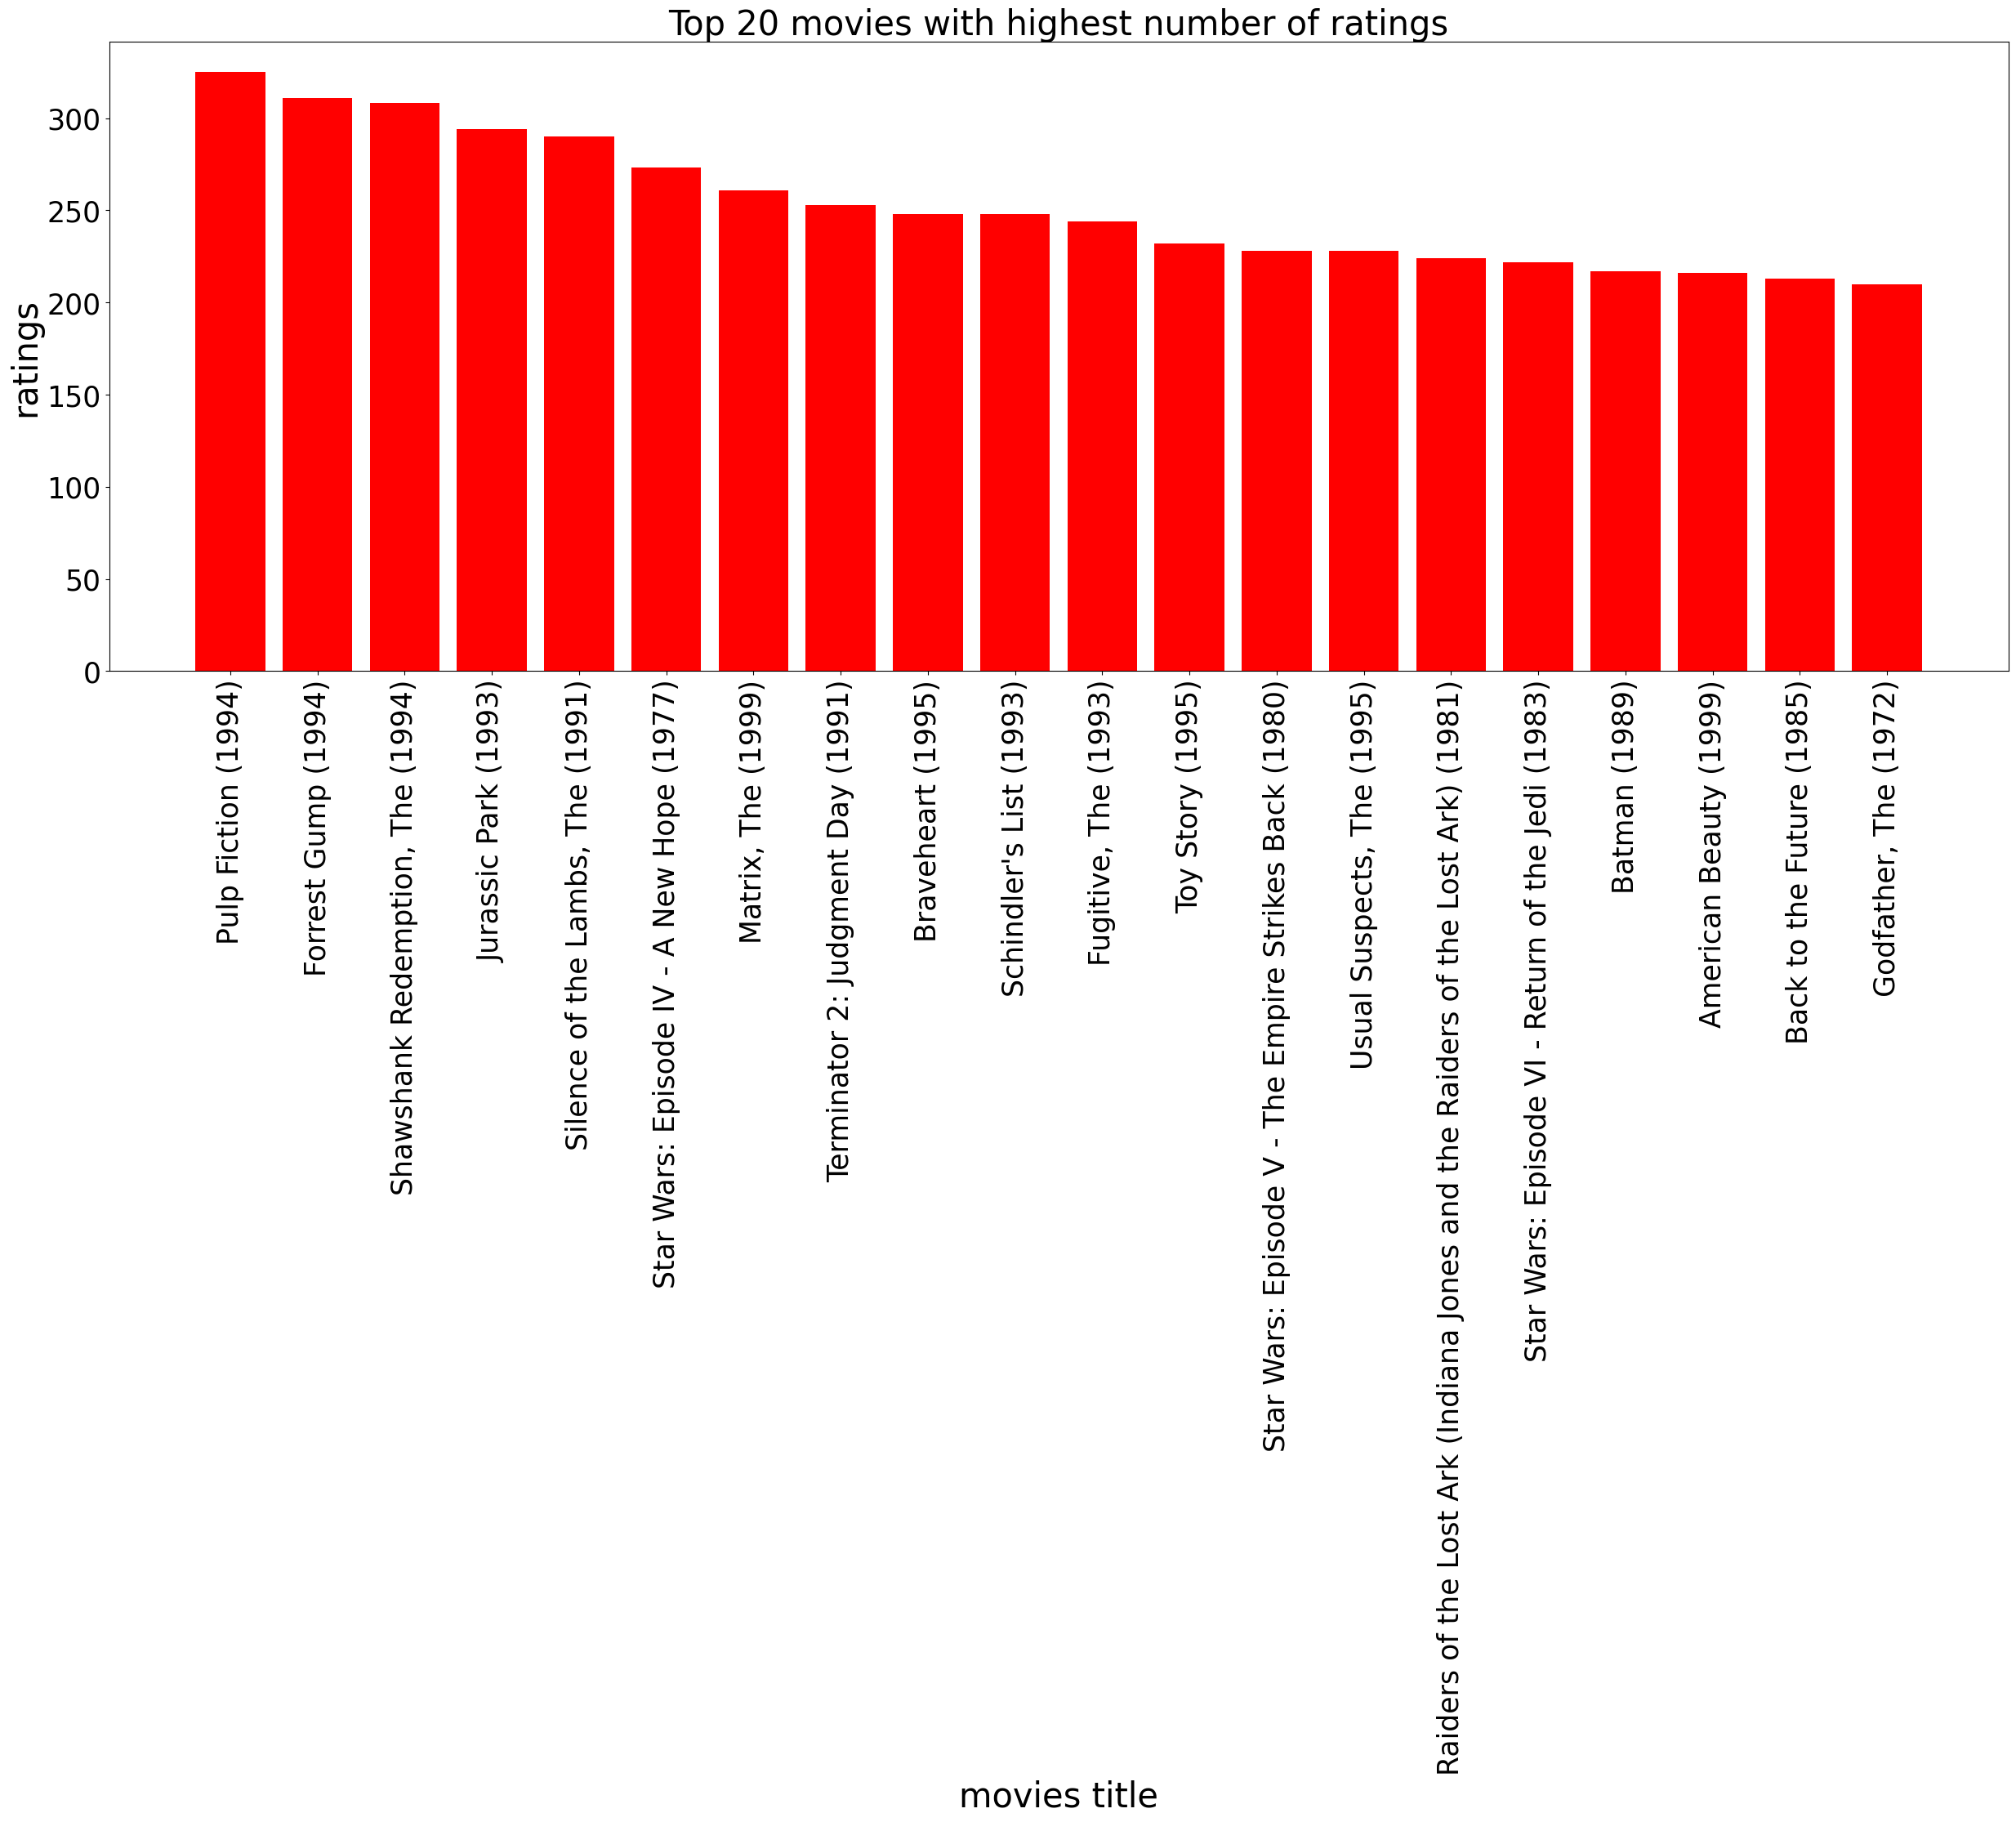

In [24]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')



```
These lines of code create a bar plot using Matplotlib with a figure size of 30x10 inches. The plot visualizes the top 20 movies with the highest number of ratings from the 'rating_count_20' DataFrame. Customizations include setting the title, axis labels, and adjusting the font sizes for better readability. The `plt.bar()` function is used to create the bar chart based on the movie titles and their corresponding rating counts. The bars are colored red for emphasis.```



In [25]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])



```
These lines of code instantiate a TfidfVectorizer object named 'cv' and then use it to transform the 'genres' column of the 'movies' DataFrame into a TF-IDF (Term Frequency-Inverse Document Frequency) matrix. The TF-IDF matrix represents the numerical values of the term frequencies in the movie genres, commonly used in natural language processing tasks.
```



In [26]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




```
These lines of code create a user-item matrix 'movie_user' using the Pandas pivot_table function. The matrix is based on the 'userId' and 'title' columns from the 'df' DataFrame, with 'rating' values representing the user ratings for each movie. This matrix is a common format for collaborative filtering recommendation systems.```



In [27]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)



```
These lines of code compute the cosine similarity matrix, named 'cosine_sim,' using the linear_kernel function from scikit-learn. The input for the kernel is the TF-IDF matrix 'tfidf_matrix' obtained from the 'genres' column of the 'movies' DataFrame. This cosine similarity matrix is often used in content-based recommendation systems to measure the similarity between different items based on their features.```



In [28]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]



```
These lines of code define a function named 'recommendations' that takes a movie title as input and returns a list of recommended movies based on cosine similarity scores. It uses the 'indices' Series to map movie titles to their corresponding indices, and the 'cosine_sim' matrix to calculate similarity scores. The function sorts the movies based on similarity scores in descending order and returns the top 20 recommended titles.```



In [29]:
recommendations('Toy Story (1995)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198



```
The `recommendations('Toy Story (1995)')` function call would provide a list of movie titles that are recommended based on cosine similarity to "Toy Story (1995)." These recommendations are determined by the similarity of movie genres, as represented in the TF-IDF matrix and cosine similarity scores.
```

